<a href="https://colab.research.google.com/github/SAPUII/Project/blob/main/Stock_Price_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [739]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##หุ้น PTT

In [740]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [741]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [742]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [743]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [744]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

#แทนที่ M ด้วยช่องว่าง
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##หุ้น SCG

In [745]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [746]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,6.15,6.10,6.15,6.05,183.00K,0.00%
1,5/1/2022,6.25,6.10,6.35,6.05,1.15M,1.63%
2,6/1/2022,6.10,6.25,6.25,6.10,133.50K,-2.40%
3,7/1/2022,6.10,6.05,6.15,6.05,205.10K,0.00%
4,10/1/2022,6.15,6.05,6.15,6.00,144.40K,0.82%


In [747]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [748]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [749]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg


<ipython-input-749-e59ed9faea6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
<ipython-input-749-e59ed9faea6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ']=scg['ปริมาณ'].astype(int)


,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##หุ้น SOLAR

In [750]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [751]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,1.51,1.52,1.54,1.49,9.13M,0.67%
1,5/1/2022,1.51,1.51,1.52,1.46,4.25M,0.00%
2,6/1/2022,1.44,1.51,1.51,1.44,9.95M,-4.64%
3,7/1/2022,1.24,1.37,1.37,1.23,93.48M,-13.89%
4,10/1/2022,1.24,1.25,1.27,1.22,21.28M,0.00%


In [752]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [753]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [754]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar


,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


## ราคาน้ำมันดิบ (WTI)

In [755]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [756]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,2/1/2022,76.03,75.83,76.12,75.83,NaN,0.53%
1,3/1/2022,76.17,76.05,76.65,74.50,NaN,0.18%
2,4/1/2022,77.25,76.19,77.84,75.92,NaN,1.42%
3,5/1/2022,77.39,77.23,78.76,76.72,NaN,0.18%
4,6/1/2022,79.69,77.38,80.43,76.92,NaN,2.97%


In [757]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [758]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [759]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti


,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##ราคาทองคำ (XAU)

In [760]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [761]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,"1,800.85","1,830.14","1,832.06","1,797.93",NaN,-1.51%
1,4/1/2022,"1,814.56","1,801.34","1,816.83","1,798.44",NaN,0.76%
2,5/1/2022,"1,809.53","1,814.90","1,829.82","1,807.97",NaN,-0.28%
3,6/1/2022,"1,788.68","1,809.94","1,811.89","1,786.03",NaN,-1.15%
4,7/1/2022,"1,795.63","1,789.55","1,799.20","1,782.63",NaN,0.39%


In [762]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [763]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [764]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,3/1/2022,1800.85
1,4/1/2022,1814.56
2,5/1/2022,1809.53
3,6/1/2022,1788.68
4,7/1/2022,1795.63
...,...,...
255,26/12/2022,1797.61
256,27/12/2022,1813.93
257,28/12/2022,1804.09
258,29/12/2022,1814.89


##อัตราแลกเปลี่ยน (EX)

In [765]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
ex.shape

(260, 7)

In [766]:
ex.head()


,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [767]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [768]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [769]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ex=ex[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ex =ex.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex


,date,cp_ex
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##Merge Table

In [770]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5.head()

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,1800.85,NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,1814.56,38.0,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,1809.53,39.0,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,1788.68,38.0,71680000.0,6.10,133500.0,1.44,9950000.0


In [771]:
tm5.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [772]:
#ลบค่า NaN
all_data= tm5.dropna()

# แทนที่เครื่องหมาย / ด้วย - ในคอลัมน์ date
all_data['date'] = all_data['date'].str.replace('/', '-')

# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data


<ipython-input-772-9071ba2101b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')
<ipython-input-772-9071ba2101b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
<ipython-input-772-9071ba2101b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [773]:
# save data
#all_data.to_csv('Project_data.csv', index=False)


## Standardize

In [774]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...
305,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [775]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.797703,-1.100940,-1.703451,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.797676,-1.137859,-1.881685,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.547293,-0.916344,-1.912759,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.583688,-0.873271,-1.680860,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.613344,-0.873271,-1.555289,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.335439,-0.270256,-0.134575,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.398189,-0.159498,-0.144739,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.428197,-0.257950,-0.089656,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [776]:
#หาความสัมพันธ์
correlation_matrix = scaled_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.051631,0.633348,0.154632,0.025324,-0.267331,-0.020053,0.258085,0.211177
cp_ex,0.051631,1.000000,0.061141,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.633348,0.061141,1.000000,-0.134076,0.008375,-0.512522,-0.112726,0.018376,0.135715
cp_ptt,0.154632,-0.585569,-0.134076,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.025324,-0.116166,0.008375,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.267331,-0.622965,-0.512522,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,-0.020053,-0.136218,-0.112726,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.258085,-0.354033,0.018376,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.211177,-0.144074,0.135715,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


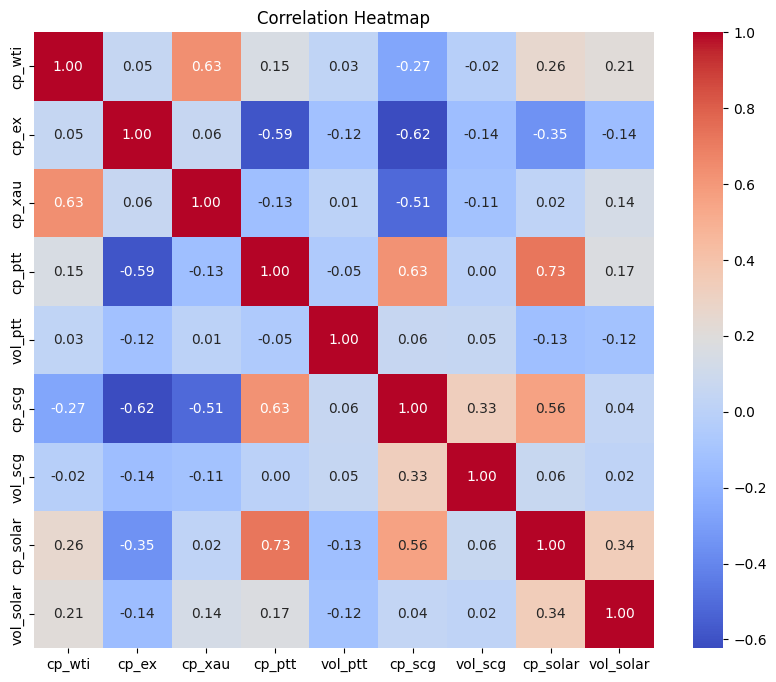

In [777]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

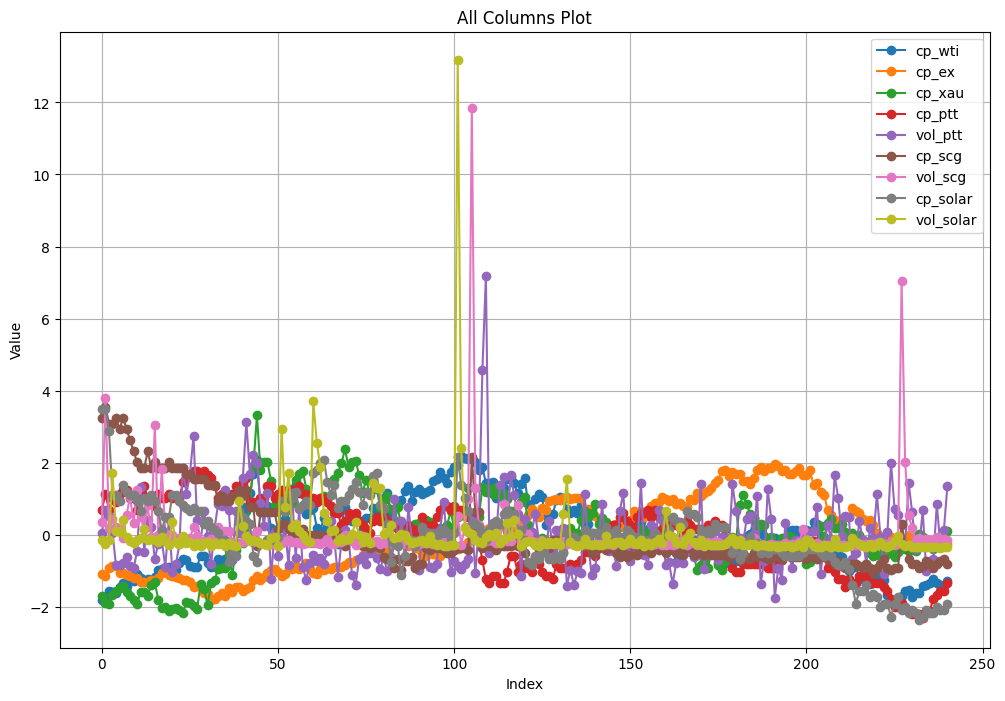

In [778]:
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#XGBoost Model

##Close Price PTT

In [779]:
s_ppt = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_ptt','cp_ptt']]
s_ppt


,cp_wti,cp_ex,cp_xau,vol_ptt,cp_ptt
0,-1.797703,-1.100940,-1.703451,0.060415,0.700069
1,-1.797676,-1.137859,-1.881685,0.690430,1.131294
2,-1.547293,-0.916344,-1.912759,0.509425,0.700069
3,-1.583688,-0.873271,-1.680860,0.062627,1.023487
4,-1.613344,-0.873271,-1.555289,-0.850508,0.915681
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.670978,-1.779472
237,-1.335439,-0.270256,-0.134575,0.845262,-1.671666
238,-1.398189,-0.159498,-0.144739,-0.296434,-1.563860
239,-1.428197,-0.257950,-0.089656,0.128614,-1.563860


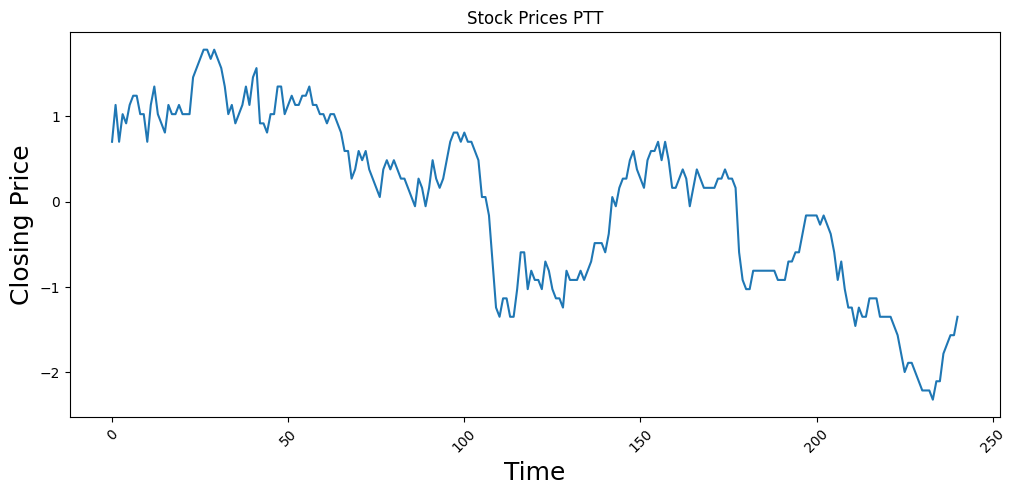

In [780]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_ppt)), s_ppt['cp_ptt'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices PTT')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [781]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_ppt[['cp_wti',	'cp_ex','cp_xau','vol_ptt']]  # Replace with your independent variables
y = s_ppt['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 100
Best max_depth: 7


In [782]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_ppt[['cp_wti',	'cp_ex','cp_xau','vol_ptt']]  # Replace with your independent variables
y = s_ppt['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=100,  # You can adjust other parameters here
        max_depth=7,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.41713838259045777
Learning Rate: 0.1, Mean Squared Error: 0.20359780402909075
Learning Rate: 0.2, Mean Squared Error: 0.16246854572199526
Learning Rate: 0.3, Mean Squared Error: 0.16126083182857803
Learning Rate: 0.4, Mean Squared Error: 0.22213796790876322


###ประเมินประสิทธิภาพ

In [783]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.3,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.40157294708256686
Mean Absolute Percentage Error (MAPE): 38.35650574789512


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [784]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
24,0.973482,1.562518
6,1.115005,1.239100
222,-1.252806,-1.456054
208,-0.426793,-1.024829
236,-1.378253,-1.779472


###กราฟ

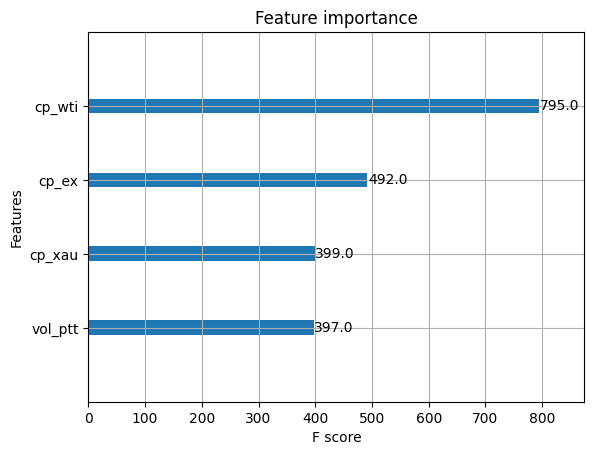

In [785]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

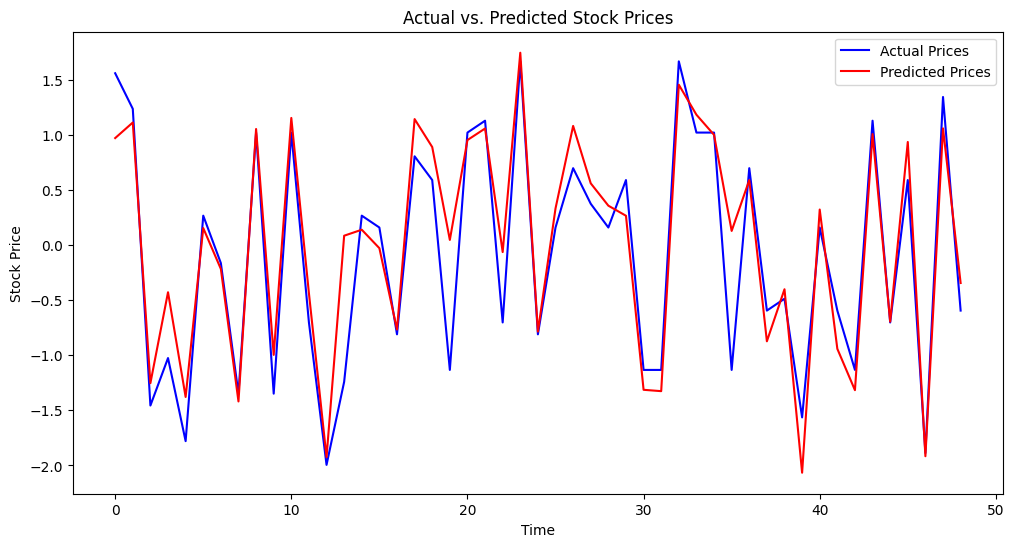

In [786]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Close Price SCG

In [787]:
s_scg = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_scg','cp_scg']]
s_scg


,cp_wti,cp_ex,cp_xau,vol_scg,cp_scg
0,-1.797703,-1.100940,-1.703451,0.362923,3.242433
1,-1.797676,-1.137859,-1.881685,3.807543,3.551029
2,-1.547293,-0.916344,-1.912759,0.186596,3.088135
3,-1.583688,-0.873271,-1.680860,0.441647,3.088135
4,-1.613344,-0.873271,-1.555289,0.225423,3.242433
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.157154,-0.923611
237,-1.335439,-0.270256,-0.134575,-0.066318,-0.800172
238,-1.398189,-0.159498,-0.144739,-0.141124,-0.738453
239,-1.428197,-0.257950,-0.089656,-0.118326,-0.676734


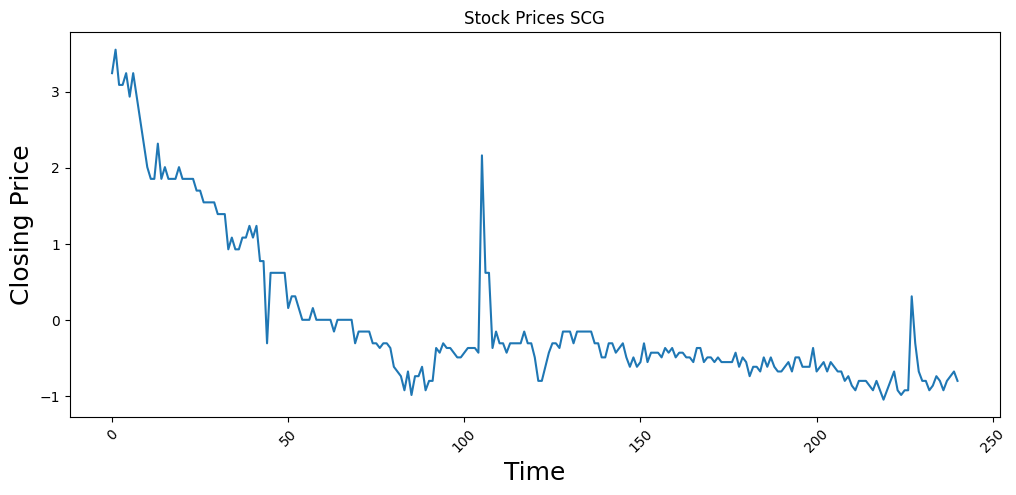

In [788]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_scg)), s_scg['cp_scg'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices SCG')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [789]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_scg[['cp_wti',	'cp_ex','cp_xau','vol_scg']]  # Replace with your independent variables
y = s_scg['cp_scg']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 50
Best max_depth: 5


In [790]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_scg[['cp_wti',	'cp_ex','cp_xau','vol_scg']]  # Replace with your independent variables
y = s_scg['cp_scg']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=50,  # You can adjust other parameters here
        max_depth=5,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.5521588758381072
Learning Rate: 0.1, Mean Squared Error: 0.06331007589012654
Learning Rate: 0.2, Mean Squared Error: 0.06707864717074351
Learning Rate: 0.3, Mean Squared Error: 0.07740651198276505
Learning Rate: 0.4, Mean Squared Error: 0.07422182743682455


###ประเมินประสิทธิภาพ

In [791]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error: 0.25161493574533
Mean Absolute Percentage Error (MAPE): 540.5108976465683


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [792]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
24,1.825974,1.699454
6,2.272978,3.242433
222,-0.877940,-0.676734
208,-0.612234,-0.800172
236,-0.833605,-0.923611


###กราฟ

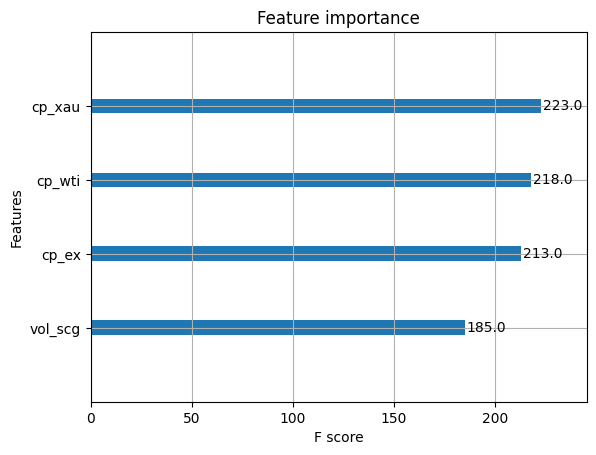

In [793]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

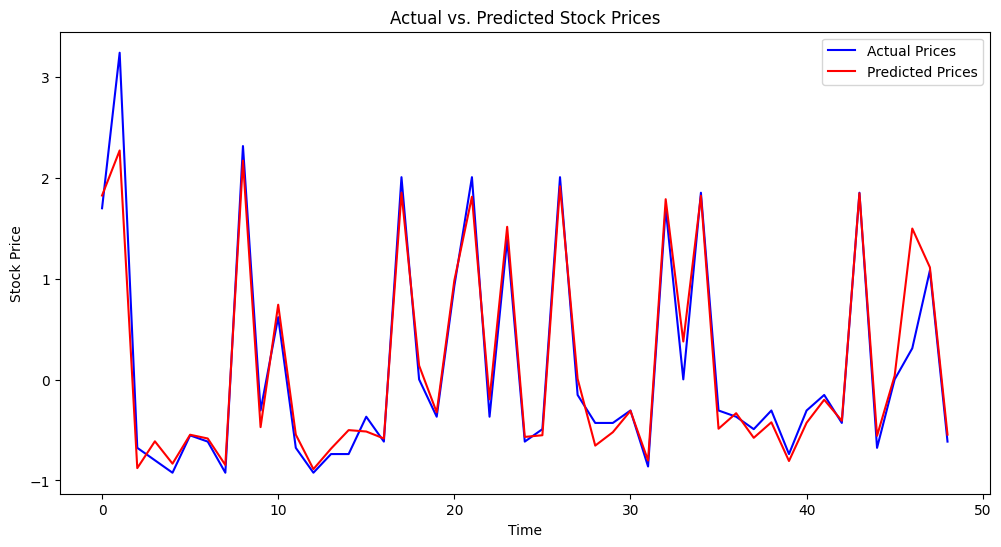

In [794]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Close Price SOLAR

In [795]:
s_solar = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_solar','cp_solar']]
s_solar

,cp_wti,cp_ex,cp_xau,vol_solar,cp_solar
0,-1.797703,-1.100940,-1.703451,-0.157981,3.496903
1,-1.797676,-1.137859,-1.881685,-0.265913,3.496903
2,-1.547293,-0.916344,-1.912759,-0.139845,2.876057
3,-1.583688,-0.873271,-1.680860,1.707604,1.102213
4,-1.613344,-0.873271,-1.555289,0.110743,1.102213
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.336467,-2.179400
237,-1.335439,-0.270256,-0.134575,-0.327620,-2.002015
238,-1.398189,-0.159498,-0.144739,-0.353457,-2.090708
239,-1.428197,-0.257950,-0.089656,-0.336688,-2.090708


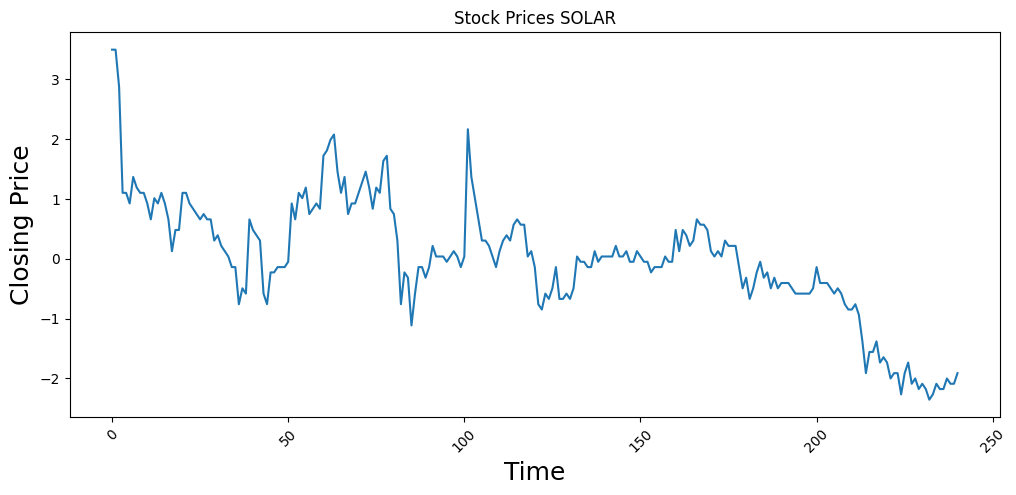

In [796]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_solar )), s_solar ['cp_solar'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices SOLAR')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [797]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_solar [['cp_wti',	'cp_ex','cp_xau','vol_solar']]  # Replace with your independent variables
y = s_solar ['cp_solar']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 100
Best max_depth: 7


In [798]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_solar [['cp_wti',	'cp_ex','cp_xau','vol_solar']]  # Replace with your independent variables
y = s_solar ['cp_solar']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=100,  # You can adjust other parameters here
        max_depth=7,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.27133152184740145
Learning Rate: 0.1, Mean Squared Error: 0.07079255074884741
Learning Rate: 0.2, Mean Squared Error: 0.08057430469351749
Learning Rate: 0.3, Mean Squared Error: 0.07694825665477285
Learning Rate: 0.4, Mean Squared Error: 0.08499143028664698


###ประเมินประสิทธิภาพ

In [799]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error: 0.2660686955446796
Mean Absolute Percentage Error (MAPE): 98.30795394138876


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [800]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
24,0.903490,0.747444
6,1.196611,1.368289
222,-2.119544,-1.913323
208,-0.357439,-0.760324
236,-2.084987,-2.179400


###กราฟ

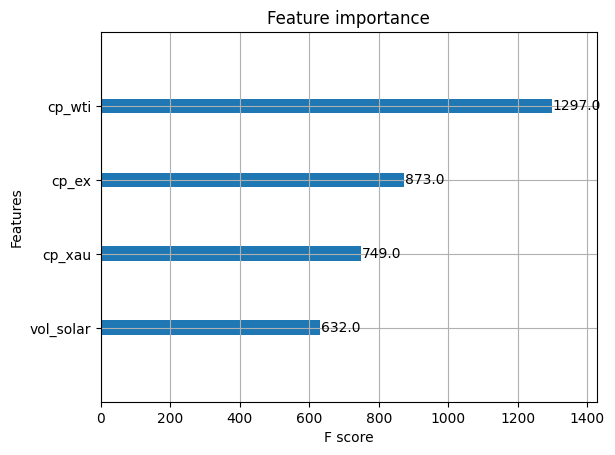

In [801]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

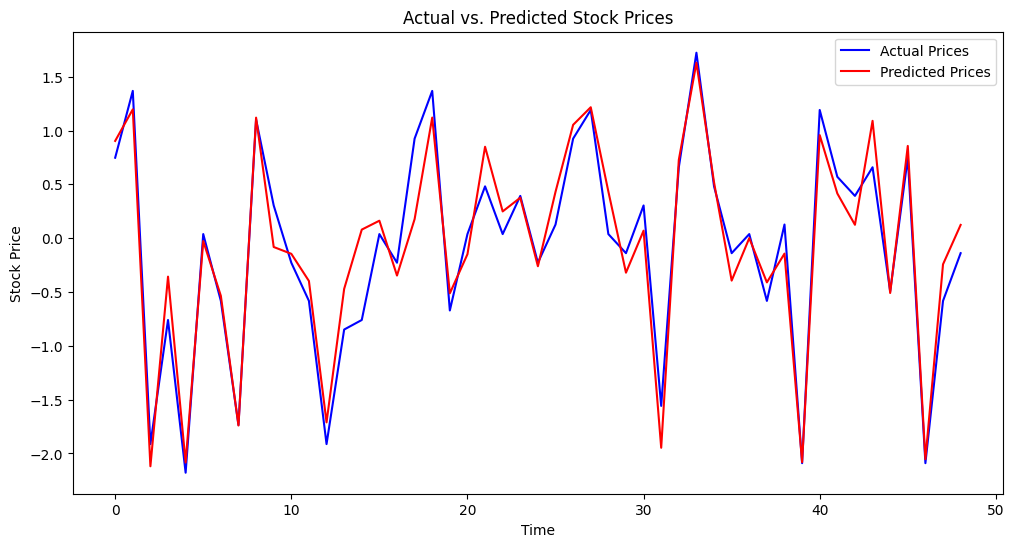

In [802]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#LSTM Model


##Close Price PTT

In [803]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# แบ่งข้อมูลเป็นชุด train และ test
train_size = int(len(s_ppt) * 0.8)
train_data, test_data = s_ppt.iloc[:train_size, :], s_ppt.iloc[train_size:, :]

# เลือกตัวแปรต้นและตัวแปรตาม
X_train, y_train = train_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, train_data['cp_ptt'].values
X_test, y_test = test_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, test_data['cp_ptt'].values

# ปรับขนาดข้อมูล
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [804]:
def create_lstm_model(neurons=50, input_shape=(3, 1)):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# กำหนดพารามิเตอร์ที่เราต้องการค้นหา
param_grid = {
    'neurons': [50, 100, 150],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# สร้าง LSTM model ด้วย KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_lstm_model, input_shape=(X_train.shape[1], 1))

# ใช้ GridSearchCV ในการค้นหาพารามิเตอร์ที่เหมาะสม
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_result = grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ModuleNotFoundError: ignored

##Close Price SCG

##Close Price SOLAR

#ARIMA-GARCH

##Close Price PTT

###ARIMA

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

###GARCH